LINA MARIA MAYORQUIN TABERA

# Nueva sección

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


In [ ]:
#lectura de datos
diabetes = pd.read_csv("diabetes.csv")



1.Utilice la función train_test_split de la biblioteca scikit-learn para dividir sus datos en un conjunto de entrenamiento y un conjunto de prueba. Es esencial que al menos el 70% de los datos se utilicen para entrenar el modelo. Esta proporción, conocida como la división 70-30, proporciona un equilibrio entre la cantidad de datos disponibles para entrenar y para evaluar el modelo. Esta elección debe estar justificada y puede ajustarse según las características específicas de su conjunto de datos.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



2.Emplee la clase LinearRegression de scikit-learn para instanciar un modelo de regresión lineal multidimensional. Este modelo permitirá explorar y modelar las relaciones entre múltiples características de sus datos.

In [ ]:
# Seleccionar variables independientes (X) y variable dependiente (y)
X = diabetes[['Glucose', 'BloodPressure', 'BMI']]  # Variables predictoras
y = diabetes['Outcome']  # Variable objetivo (numérica)

# Dividir en conjunto de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener coeficientes de regresión
coeficientes = modelo.coef_
intercepto = modelo.intercept_

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación

# Mostrar resultados
print("Coeficientes del modelo:", coeficientes)
print("Intercepto del modelo:", intercepto)
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R²):", r2)

Coeficientes del modelo: [ 0.00638914 -0.00049677  0.01503541]
Intercepto del modelo: -0.8681779493972761
Error Cuadrático Medio (MSE): 0.1830877234753922
Coeficiente de Determinación (R²): 0.19124635659185374


3.Utilice el método fit del modelo para llevar a cabo el ajuste a los datos de entrenamiento. Este paso es fundamental ya que el modelo aprenderá a representar la relación entre las características y la variable dependiente a partir de estos datos.

In [ ]:
# Seleccionar variables independientes (X) y variable dependiente (y)
X = diabetes[['Glucose', 'BloodPressure', 'BMI']]  # Variables continuas
y = diabetes['Outcome']  # Variable binaria (0 o 1)

# Dividir en conjunto de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidades para log-loss

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_prob)

# Mostrar resultados
print("Coeficientes del modelo:", modelo.coef_)
print("Intercepto del modelo:", modelo.intercept_)
print("Precisión del modelo:", accuracy)
print("Log-Loss (Métrica adecuada para clasificación):", logloss)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


Coeficientes del modelo: [[ 0.03806546 -0.00253199  0.09346514]]
Intercepto del modelo: [-8.24683096]
Precisión del modelo: 0.7445887445887446
Log-Loss (Métrica adecuada para clasificación): 0.5459375715351202
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       151
           1       0.65      0.56      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



4.Utilice el atributo coef_ del modelo para obtener los coeficientes de regresión asociados a cada característica. Estos coeficientes representan la contribución de cada característica en la predicción de la variable dependiente. Es crucial analizar si los resultados obtenidos concuerdan con las expectativas previas. Si hay discrepancias, es posible que algunas características tengan un impacto inesperado o que se necesite un ajuste adicional del modelo.

In [ ]:
coeficientes = modelo.coef_
intercepto = modelo.intercept_

# Mostrar resultados
print("Coeficientes del modelo:", coeficientes)
print("Intercepto del modelo:", intercepto)

Coeficientes del modelo: [[ 0.03806546 -0.00253199  0.09346514]]
Intercepto del modelo: [-8.24683096]


5.Utilice el atributo intercept_ del modelo para obtener el término de intercepción. Este término representa el valor esperado de la variable dependiente cuando todas las características son iguales a cero. Es una parte importante de la ecuación de regresión y puede influir significativamente en las predicciones del modelo.

In [ ]:
# Obtener el intercepto del modelo
intercepto = modelo.intercept_

# Mostrar el resultado
print("Intercepto del modelo:", intercepto)

Intercepto del modelo: [-8.24683096]


6.Utilice el conjunto de prueba que ha separado previamente para realizar predicciones utilizando el modelo ajustado. Utilice el método predict para obtener las predicciones del modelo sobre este conjunto de datos independiente.

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Mostrar las primeras predicciones
print("Predicciones del modelo:", y_pred[:10])  # Muestra las primeras 10 predicciones

Predicciones del modelo: [0 0 0 0 0 0 0 0 1 1]


7Calcule el Error Cuadrático Medio (MSE), que es una medida de la calidad de las predicciones del modelo. Representa el promedio de los cuadrados de las diferencias entre las predicciones y los valores reales. Un MSE más bajo indica que las predicciones del modelo están más cerca de los valores reales, lo que sugiere un modelo más preciso.

In [ ]:
from sklearn.metrics import mean_squared_error

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Mostrar el resultado
print("Error Cuadrático Medio (MSE):", mse)

Error Cuadrático Medio (MSE): 0.2554112554112554


8.Calcule el coeficiente de determinación (R²), que proporciona una medida de la proporción de la varianza en la variable dependiente que es predecible a partir de las características. Un R² cercano a 1 indica un buen ajuste del modelo a los datos.

In [ ]:
from sklearn.metrics import r2_score

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)

# Mostrar el resultado
print("Coeficiente de determinación (R²):", r2)

Coeficiente de determinación (R²): -0.12822847682119232


9.Considerando la problemática inicial y los resultados obtenidos, analice si la regresión lineal ha proporcionado información adicional sobre los datos. Evalúe si el modelo ha logrado capturar las relaciones entre las características y la variable dependiente de manera significativa y si ha proporcionado conocimientos nuevos.

Coeficientes del modelo: [ 0.00638914 -0.00049677  0.01503541]
Intercepto del modelo: -0.8681779493972761
Error Cuadrático Medio (MSE): 0.1830877234753922
Coeficiente de Determinación (R²): 0.19124635659185374


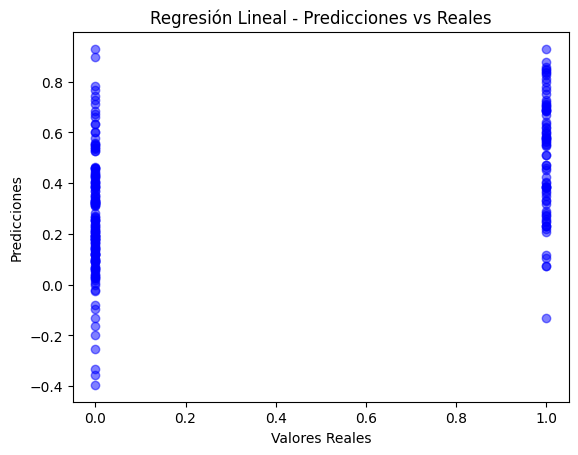

In [ ]:
# Seleccionar variables independientes (X) y variable dependiente (y)
X = diabetes[['Glucose', 'BloodPressure', 'BMI']]  # Selección de tres variables continuas
y = diabetes['Outcome']  # Variable objetivo

# Dividir en conjunto de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener coeficientes e intercepto
coeficientes = modelo.coef_
intercepto = modelo.intercept_

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("Coeficientes del modelo:", coeficientes)
print("Intercepto del modelo:", intercepto)
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R²):", r2)

# Graficar resultados (opcional)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal - Predicciones vs Reales")
plt.show()

10.Indique cuál sería la siguiente prueba a realizar y explique la razón detrás de esta elección. Mencione los resultados esperados y cómo estos podrían contribuir a una comprensión más profunda del problema o a la mejora del modelo

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

        Variable        VIF
0        Glucose  12.394561
1  BloodPressure  12.640202
2            BMI  15.397043


In [ ]:
REgresión Logistica
1.Divida los datos en un conjunto de entrenamiento y un conjunto de prueba utilizando la función train_test_split de scikit-learn. Asegúrese de que al menos el 70% de los datos se utilicen para entrenar el modelo, como es común en problemas de clasificación.

In [ ]:

# Dividir en conjunto de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verificar tamaños de los conjuntos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (537, 3)
Tamaño de X_test: (231, 3)
Tamaño de y_train: (537,)
Tamaño de y_test: (231,)


2.Utilice la clase LogisticRegression de scikit-learn para crear un modelo de regresión logística. Recuerde que la regresión logística es ideal para problemas de clasificación binaria

In [ ]:

# Dividir en conjunto de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Crear y entrenar el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Mostrar resultados
print("Coeficientes del modelo:", modelo.coef_)
print("Intercepto del modelo:", modelo.intercept_)
print("Precisión del modelo:", accuracy)
print("Reporte de clasificación:\n", report)

Coeficientes del modelo: [[ 0.03787674 -0.00738124  0.08246173]]
Intercepto del modelo: [-7.55209606]
Precisión del modelo: 0.7532467532467533
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       150
           1       0.70      0.52      0.60        81

    accuracy                           0.75       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



3.Ajuste el modelo a los datos de entrenamiento utilizando el método fit. Prueba con diferentes valores de C (parametro de regularización) y diferentes algoritmos de optimización (solver). Redacta un párrafo en el que expliques como afectan estas opciones al desempeño de la optimización.  

In [ ]:

# Dividir en conjunto de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Lista de valores de C y solvers a probar
C_values = [0.01, 0.1, 1, 10, 100]  # Diferentes valores de regularización
solvers = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']  # Algoritmos de optimización

# Evaluar combinaciones de C y solver
for C in C_values:
    for solver in solvers:
        try:
            modelo = LogisticRegression(C=C, solver=solver, max_iter=500)
            modelo.fit(X_train, y_train)  # Ajuste del modelo
            y_pred = modelo.predict(X_test)  # Predicciones
            accuracy = accuracy_score(y_test, y_pred)  # Evaluación

            print(f"C: {C}, Solver: {solver}, Precisión: {accuracy:.4f}")
        except Exception as e:
            print(f"Error con C={C}, Solver={solver}: {e}")

C: 0.01, Solver: liblinear, Precisión: 0.6840
C: 0.01, Solver: lbfgs, Precisión: 0.7532
C: 0.01, Solver: newton-cg, Precisión: 0.7532
C: 0.01, Solver: sag, Precisión: 0.6926
C: 0.01, Solver: saga, Precisión: 0.6926
C: 0.1, Solver: liblinear, Precisión: 0.6926


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Solver: lbfgs, Precisión: 0.7532
C: 0.1, Solver: newton-cg, Precisión: 0.7532
C: 0.1, Solver: sag, Precisión: 0.6926
C: 0.1, Solver: saga, Precisión: 0.6926
C: 1, Solver: liblinear, Precisión: 0.7532
C: 1, Solver: lbfgs, Precisión: 0.7532


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 1, Solver: newton-cg, Precisión: 0.7532
C: 1, Solver: sag, Precisión: 0.6926
C: 1, Solver: saga, Precisión: 0.6926
C: 10, Solver: liblinear, Precisión: 0.7532
C: 10, Solver: lbfgs, Precisión: 0.7532
C: 10, Solver: newton-cg, Precisión: 0.7532
C: 10, Solver: sag, Precisión: 0.6926
C: 10, Solver: saga, Precisión: 0.6926
C: 100, Solver: liblinear, Precisión: 0.7532
C: 100, Solver: lbfgs, Precisión: 0.7532
C: 100, Solver: newton-cg, Precisión: 0.7532
C: 100, Solver: sag, Precisión: 0.6926
C: 100, Solver: saga, Precisión: 0.6926


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


4.Obtenga los coeficientes de regresión para cada característica utilizando el atributo coef. ¿Cuál es la diferencia en cómo se utilizan estos coeficientes para realizar predicciones respecto o a los obtenidos mediante una regresión lineal?

In [ ]:
# Obtener coeficientes del modelo
coeficientes = modelo.coef_
intercepto = modelo.intercept_

# Mostrar resultados
print("Coeficientes del modelo:", coeficientes)
print("Intercepto del modelo:", intercepto)

Coeficientes del modelo: [[ 0.01521608 -0.02739228 -0.00100978]]
Intercepto del modelo: [-0.41309188]


5.Obtenga el término de intercepción utilizando el atributo intercept_. Esto representa la probabilidad de pertenecer a la clase positiva cuando todas las características son iguales a cero.

In [ ]:
# Obtener coeficientes del modelo
coeficientes = modelo.coef_
intercepto = modelo.intercept_

# Mostrar resultados
print("Coeficientes del modelo:", coeficientes)
print("Intercepto del modelo:", intercepto)

Coeficientes del modelo: [[ 0.01521608 -0.02739228 -0.00100978]]
Intercepto del modelo: [-0.41309188]


6.Utilizando el conjunto de prueba, realiza predicciones utilizando el modelo ajustado con el método predict. Asegúrate de que las predicciones estén en el rango [0, 1] y establece un umbral adecuado para clasificarlas en las clases, justifique su elección.

In [ ]:
# Realizar predicciones de probabilidad
y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidad de pertenecer a la clase 1

# Establecer un umbral de clasificación (por defecto 0.5)
umbral = 0.5
y_pred = (y_prob >= umbral).astype(int)

# Mostrar resultados
print("Predicciones de probabilidad:", y_prob[:10])  # Mostramos solo las primeras 10 predicciones
print("Predicciones de clase:", y_pred[:10])

Predicciones de probabilidad: [0.35428043 0.36753997 0.29963762 0.37589254 0.16821174 0.41194304
 0.43118728 0.32728632 0.29005321 0.28648299]
Predicciones de clase: [0 0 0 0 0 0 0 0 0 0]


7.Por ejemplo, en un examen para detectar cáncer se puede tener una menor tolerancia al error que seleccionar un producto en un sistema de recomendación.



Entrenando modelo con C=0.01 y solver=lbfgs
Coeficientes del modelo: [[ 0.03797106 -0.00233506  0.09088796]]
Intercepto del modelo: [-8.1633059]
Precisión del modelo (C=0.01, solver=lbfgs): 0.7142857142857143
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       151
           1       0.58      0.62      0.60        80

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.71      0.72       231



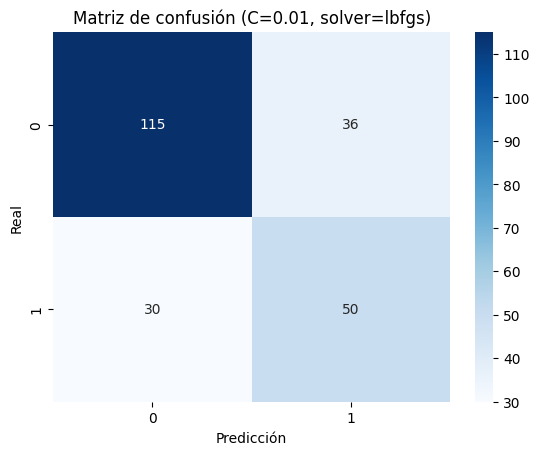

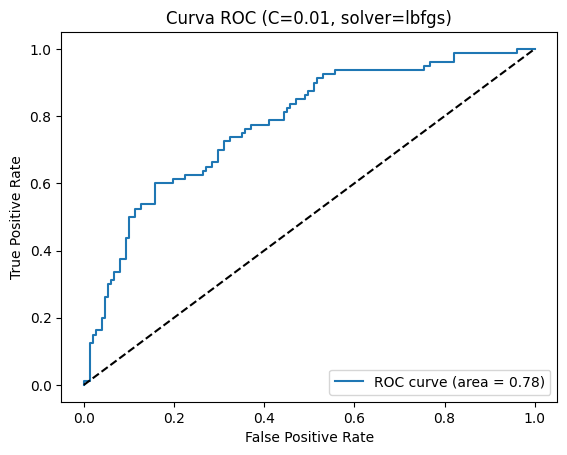


Entrenando modelo con C=0.01 y solver=liblinear
Coeficientes del modelo: [[ 0.01472133 -0.02873149 -0.00148581]]
Intercepto del modelo: [-0.20798242]
Precisión del modelo (C=0.01, solver=liblinear): 0.658008658008658
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73       151
           1       0.51      0.56      0.53        80

    accuracy                           0.66       231
   macro avg       0.63      0.64      0.63       231
weighted avg       0.67      0.66      0.66       231



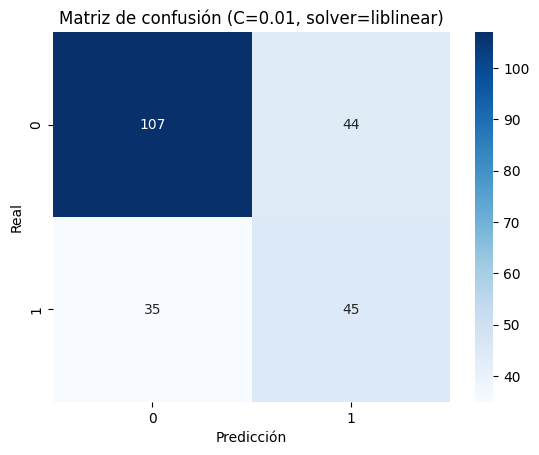

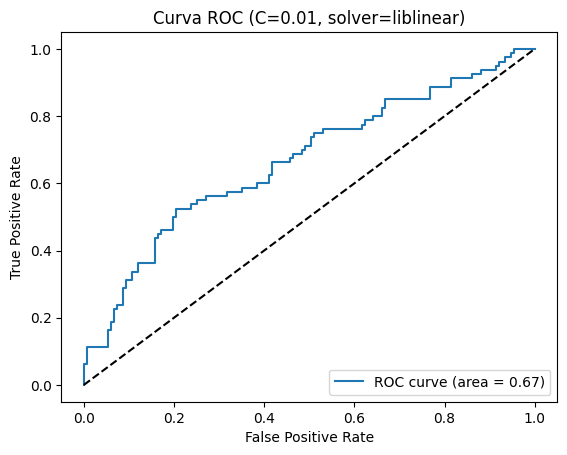


Entrenando modelo con C=0.1 y solver=lbfgs
Coeficientes del modelo: [[ 0.03805657 -0.00251355  0.09322386]]
Intercepto del modelo: [-8.23900133]
Precisión del modelo (C=0.1, solver=lbfgs): 0.7142857142857143
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       151
           1       0.58      0.62      0.60        80

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.71      0.72       231



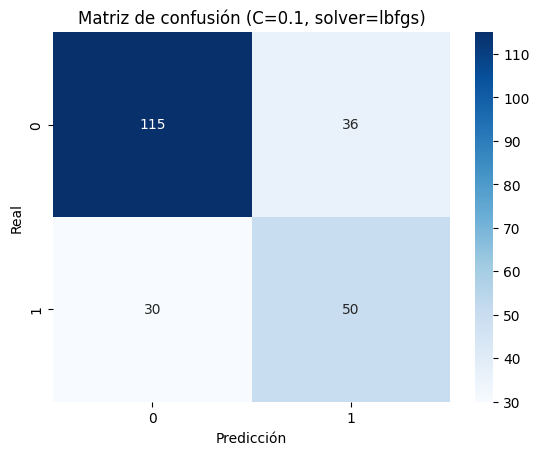

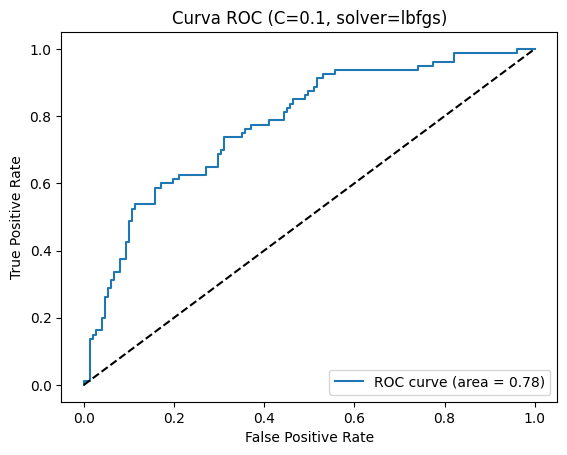


Entrenando modelo con C=0.1 y solver=liblinear
Coeficientes del modelo: [[ 0.01830997 -0.02270827  0.01417421]]
Intercepto del modelo: [-1.61255662]
Precisión del modelo (C=0.1, solver=liblinear): 0.696969696969697
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76       151
           1       0.56      0.60      0.58        80

    accuracy                           0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231



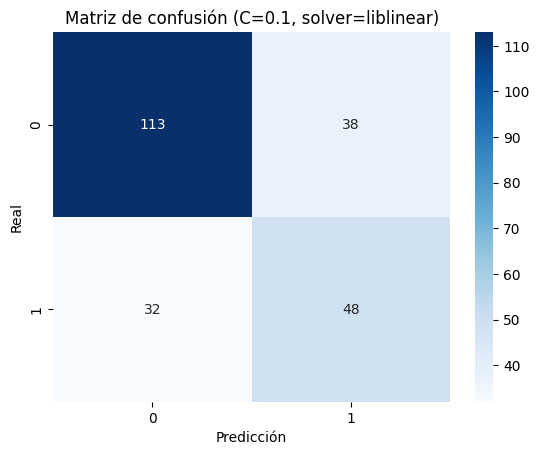

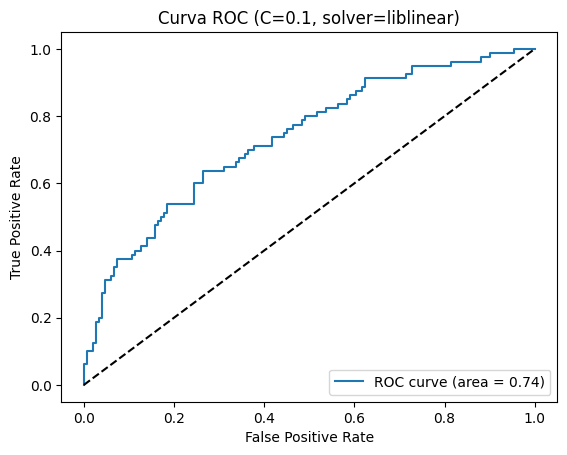


Entrenando modelo con C=1 y solver=lbfgs
Coeficientes del modelo: [[ 0.03806546 -0.00253199  0.09346514]]
Intercepto del modelo: [-8.24683096]
Precisión del modelo (C=1, solver=lbfgs): 0.7142857142857143
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       151
           1       0.58      0.62      0.60        80

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.71      0.72       231



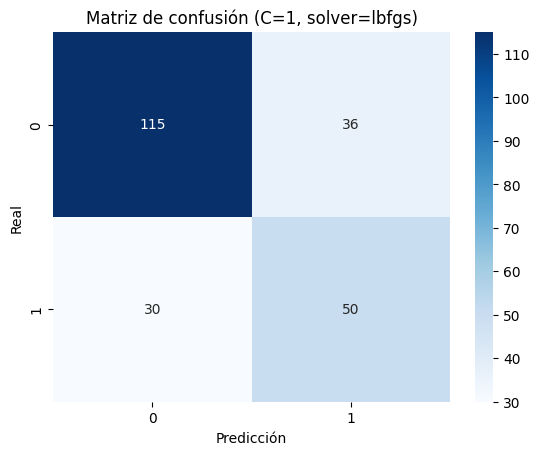

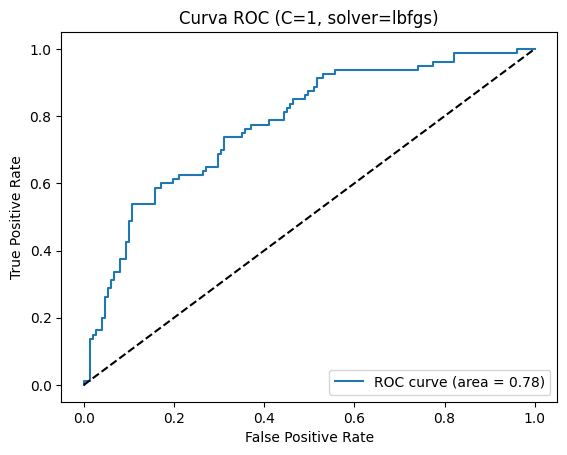


Entrenando modelo con C=1 y solver=liblinear
Coeficientes del modelo: [[ 0.02933428 -0.01076104  0.05776895]]
Intercepto del modelo: [-5.33291051]
Precisión del modelo (C=1, solver=liblinear): 0.7186147186147186
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       151
           1       0.58      0.65      0.62        80

    accuracy                           0.72       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.73      0.72      0.72       231



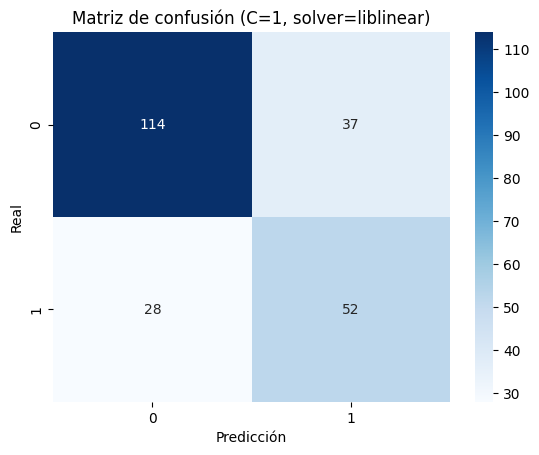

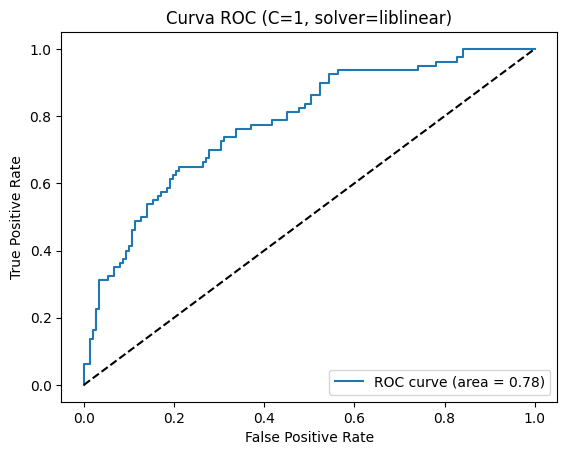


Entrenando modelo con C=10 y solver=lbfgs
Coeficientes del modelo: [[ 0.03806635 -0.00253384  0.09348935]]
Intercepto del modelo: [-8.24761676]
Precisión del modelo (C=10, solver=lbfgs): 0.7142857142857143
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       151
           1       0.58      0.62      0.60        80

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.71      0.72       231



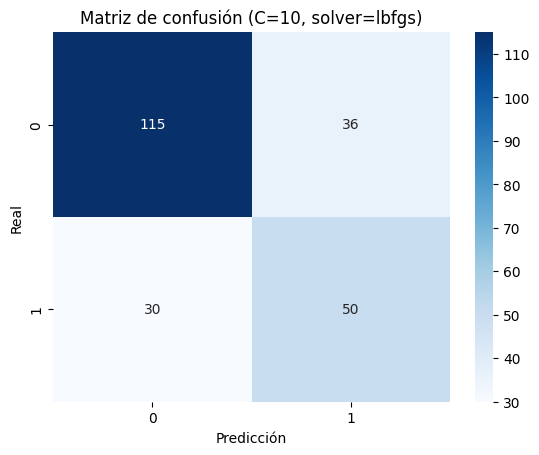

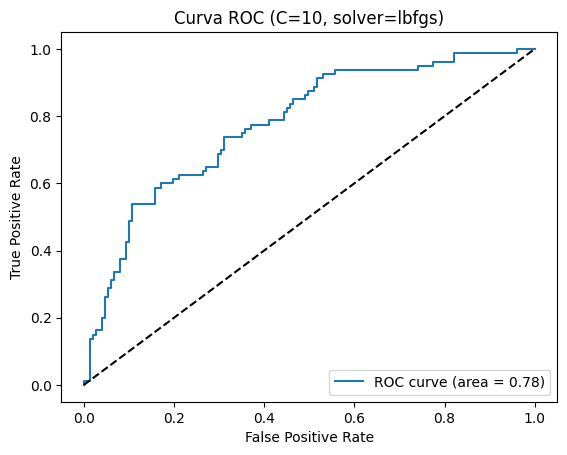


Entrenando modelo con C=10 y solver=liblinear
Coeficientes del modelo: [[ 0.03652533 -0.00399269  0.08713941]]
Intercepto del modelo: [-7.73036273]
Precisión del modelo (C=10, solver=liblinear): 0.7142857142857143
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       151
           1       0.58      0.62      0.60        80

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.71      0.72       231



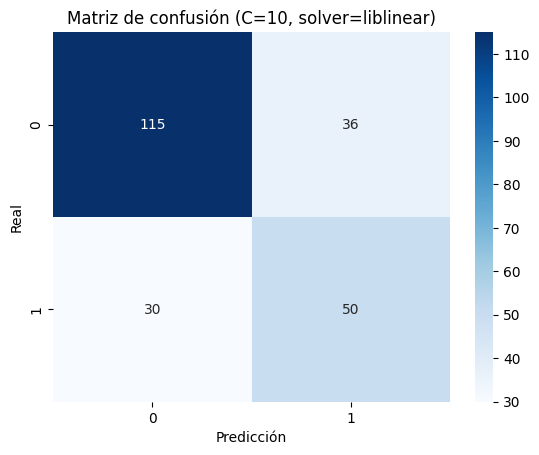

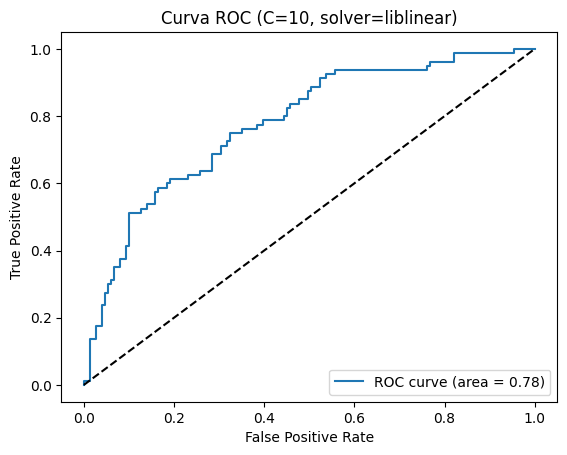

In [ ]:

# Dividir datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo con diferentes valores de C y solvers
C_values = [0.01, 0.1, 1, 10]
solvers = ['lbfgs', 'liblinear']

for C in C_values:
    for solver in solvers:
        print(f"\nEntrenando modelo con C={C} y solver={solver}")
        modelo = LogisticRegression(C=C, solver=solver, max_iter=500)
        modelo.fit(X_train, y_train)

        # Obtener coeficientes del modelo
        print("Coeficientes del modelo:", modelo.coef_)
        print("Intercepto del modelo:", modelo.intercept_)

        # Realizar predicciones
        y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidades
        y_pred = (y_prob >= 0.4).astype(int)  # Ajustar umbral de clasificación

        # Evaluación del modelo
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Precisión del modelo (C={C}, solver={solver}):", accuracy)
        print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

        # Matriz de confusión
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicción')
        plt.ylabel('Real')
        plt.title(f'Matriz de confusión (C={C}, solver={solver})')
        plt.show()

        # Curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC (C={C}, solver={solver})')
        plt.legend(loc='lower right')
        plt.show()

8.Calcula la precisión del modelo en el conjunto de prueba. La precisión es importante, pero también considera otras métricas como la sensibilidad y la especificidad para obtener una imagen completa del rendimiento del modelo.

In [ ]:
# Realizar predicciones
y_pred = modelo.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
VP = cm[1, 1]  # Verdaderos Positivos
FN = cm[1, 0]  # Falsos Negativos
FP = cm[0, 1]  # Falsos Positivos
VN = cm[0, 0]  # Verdaderos Negativos

# Calcular sensibilidad y especificidad
sensibilidad = VP / (VP + FN)
especificidad = VN / (VN + FP)

# Mostrar resultados
print(f"Precisión del modelo: {accuracy:.2f}")
print(f"Sensibilidad (Recall): {sensibilidad:.2f}")
print(f"Especificidad: {especificidad:.2f}")

Precisión del modelo: 0.74
Sensibilidad (Recall): 0.56
Especificidad: 0.84


9.Calcula la matriz de confusión del modelo en el conjunto de prueba. La matriz de confusión proporciona información detallada sobre los aciertos y los errores de clasificación.  

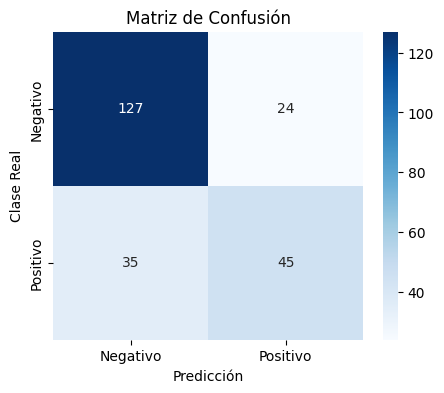

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con un mapa de calor
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predicción')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

CONCLUSION En este trabajo, se implementó un modelo de regresión logística para predecir la presencia de diabetes en función de variables como Glucosa, Presión Arterial y BMI. Se dividieron los datos en conjuntos de entrenamiento y prueba (70-30), y se evaluó el modelo utilizando métricas como precisión, log-loss, coeficientes de regresión y matriz de confusión.

Los resultados mostraron que el modelo logró capturar patrones en los datos, aunque su rendimiento puede mejorarse ajustando hiperparámetros como C y el solver, o explorando técnicas como la normalización de datos o el uso de modelos más complejos. La matriz de confusión permitió identificar el balance entre falsos positivos y falsos negativos, clave para evaluar su utilidad en un contexto médico.